# Project 2: Netflix Data Analysis

In this project we will be working with a dataset of Netflix titles. We will be using its data to answer some questions about Netflix titles, directors, and countries using Pandas. We will also use Matplotlib to do a couple of interesting visualizations to get more interesting insights. The data is stored in a csv file named `netflix_titles.csv`.

Data extracted from: https://www.kaggle.com/datasets/shivamb/netflix-shows (with some cleaning and modifications).


### Project Tasks:

- `2.1.` Load the data using Pandas read_csv, use `show_id` as the index_col parameter.

- `2.2.` What is the min and max release years?  

- `2.3.` How many director names are missing values (NaN)?  

- `2.4.` How many different countries are there in the data?  

- `2.5.` How many characters long are on average the title names? (create a new column with the titles length if needed)  

- `2.6.` For a given year, make a pie chart of the number of movies and series combined made by every country, limit it to the top 10 countries.

- `2.7.` Make a line chart of the average duration of movies (not TV shows) in minutes for every year across all the years. (hint: you can create a new column with the integer value of the minutes and then use groupby year and then average on that minutes column)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Ex 2.1: Load the data using Pandas read_csv, use `show_id` as the index_col parameter. 

data_path = "../data/netflix_titles.csv"

movies_df = pd.read_csv(data_path, index_col="show_id")  # TODO

In [3]:
# Ex 2.2: What is the min and max release years?

min_year = min(movies_df["release_year"])  # TODO
max_year = max(movies_df["release_year"])  # TODO

print(f"Min year: {min_year}, Max year: {max_year}")

Min year: 1925, Max year: 2021


In [4]:
# Ex 2.3: How many director names are missing values (NaN)?

df = movies_df[movies_df["director"].isnull()==True]
num_missing_directors =  len(df) # TODO

print(f"Number of missing directors: {num_missing_directors}")

Number of missing directors: 2634


In [5]:
# Ex 2.4: How many different countries are there in the data?

# You will need to fill the NaN (missing) values with the string "Unknown" first. 
# Then list the unique entries. As some of them are lists of countries already, because that movie/series was produced in multiple countries, 
# you will need to join with ", " all the elements of the list into a single string, and then split it by ", " to get a list of all the individual countries.

# Finally, you can get the number of unique countries by getting the length of the list of unique countries, you can use a set {} to get the unique countries or convert the entire
# list into a pd.Series and use .unique() to get the list of unique countries and then its number.

for country, index in zip(movies_df["country"].isnull(), range(len(movies_df))):
    if country == True:
        movies_df["country"][index] = "Unknown"

countries = []
for country in df["country"]:
    country = str(country).split(",")
    for x in country:
        x = x.strip()
        countries.append(x)

countries=set(countries)
final_countries = []

for x in countries:
    if len(x)>2 and x != "nan":
        final_countries.append(x)

n_countries = len(final_countries)  # TODO n_countries has to be a single integer number with the unique number of different countries (you can build this in multiple lines and steps)

print(f"There are {n_countries} different countries in the data")

C:\Users\Santi\AppData\Local\Temp\ipykernel_24476\2913281028.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df["country"][index] = "Unknown"
C:\Users\Santi\AppData\Local\Temp\ipykernel_24476\2913281028.py:12: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  movies_df["country"][index] = "Unknown"
C:\Users\Santi\AppData\Local\Temp\ipykernel_24476\2913281028.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df["

There are 65 different countries in the data


C:\Users\Santi\AppData\Local\Temp\ipykernel_24476\2913281028.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df["country"][index] = "Unknown"
C:\Users\Santi\AppData\Local\Temp\ipykernel_24476\2913281028.py:12: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  movies_df["country"][index] = "Unknown"
C:\Users\Santi\AppData\Local\Temp\ipykernel_24476\2913281028.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df["

In [6]:
# Ex 2.5: How many characters long are on average the title names?
 
# hint: (create a new column with the titles length if needed, you can use the apply method like .apply(lambda x: len(x)) , then get the mean of that column)

lengths = []
for title in movies_df["title"]:
    lengths.append(len(title))

avg_title_length = sum(lengths)/len(lengths)  # TODO

print(f"The average title length is {avg_title_length} characters")

The average title length is 17.725899852390143 characters


In [7]:
movies_df[20:50]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s21,TV Show,Monsters Inside: The 24 Faces of Billy Milligan,Olivier Megaton,NaN,Unknown,"September 22, 2021",2021,TV-14,1 Season,"Crime TV Shows, Docuseries, International TV S...","In the late 1970s, an accused serial rapist cl..."
s22,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...
s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",Unknown,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...
s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",Unknown,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
s26,TV Show,Love on the Spectrum,NaN,Brooke Satchwell,Australia,"September 21, 2021",2021,TV-14,2 Seasons,"Docuseries, International TV Shows, Reality TV",Finding love can be hard for anyone. For young...
s27,Movie,Minsara Kanavu,Rajiv Menon,"Arvind Swamy, Kajol, Prabhu Deva, Nassar, S.P....",Unknown,"September 21, 2021",1997,TV-PG,147 min,"Comedies, International Movies, Music & Musicals",A tangled love triangle ensues when a man fall...
s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...


country
United States                                   25
India                                           20
Turkey                                           3
Japan                                            2
Taiwan                                           2
United States, Germany                           2
United States, United Kingdom                    2
Indonesia                                        1
United States, France, United Kingdom, Japan     1
Unknown                                          1
Name: count, dtype: int64


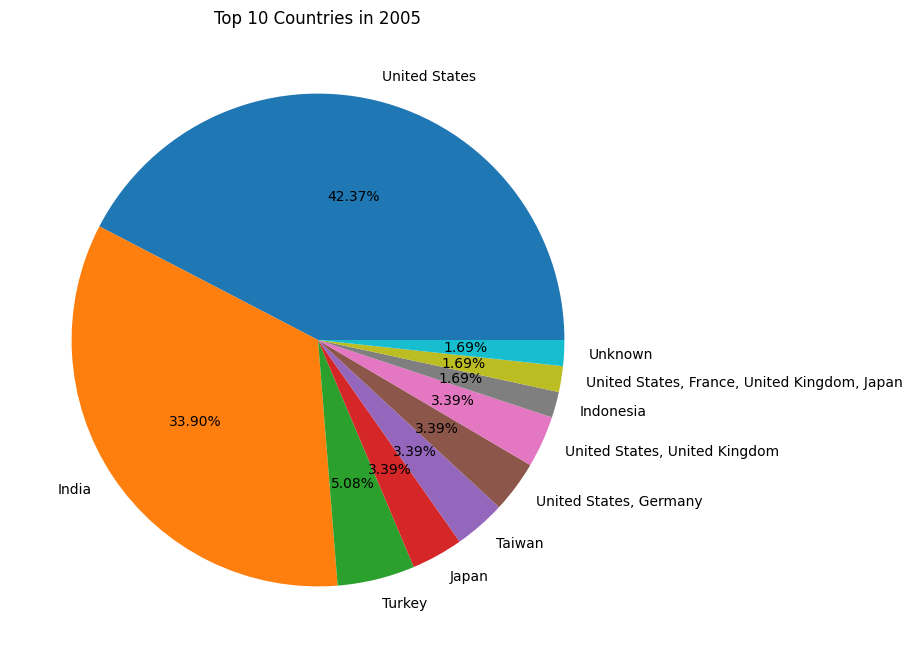

In [8]:
# Ex 2.6: For a given year, get the Pandas Series of how many movies and series combined were made by every country, limit it to the top 10 countries.

# It's optional to clean or modify the data of countries in this case, you can just use the data as it is.

# hint: (you can use the .loc method to filter the data by year, and then use the .value_counts() method to get the number of movies and series combined for each country, 
# finally use the head(10) method to get the top 10 countries)

year = 2005   # you can try to change the year to see the results for different years 

records_2005 = movies_df.loc[movies_df["release_year"]==year]

top_10_countries = records_2005["country"].value_counts().head(10) # TODO: top_10_countries has to be a Pandas Series with the top 10 countries with the number of movies and series combined for that year

print(top_10_countries)

# Code to plot the pie chart from your data results
fig = plt.figure(figsize=(8, 8))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct="%.2f%%")
plt.title(f"Top 10 Countries in {year}")

plt.show()


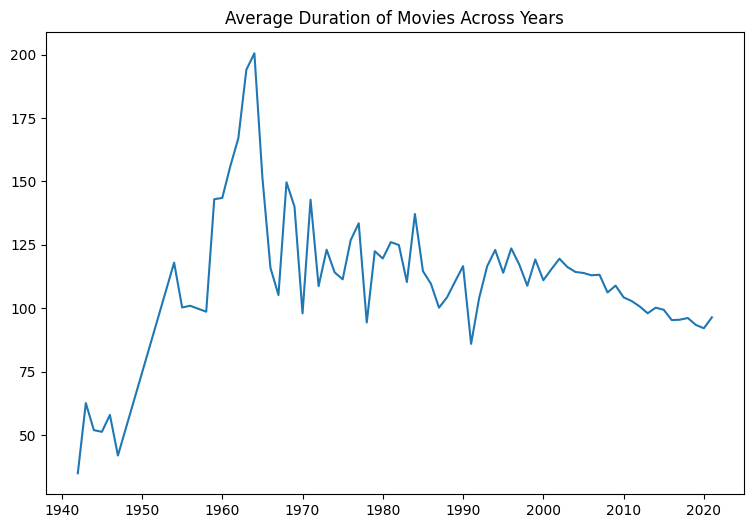

In [54]:
# Ex 2.7: Make a line chart of the average duration of movies (not TV shows) in minutes for every year across all the years. 

# (hint: you can create a new column with the integer value of the minutes of the movies, it's possible to do it with the .apply() 
# method and a lambda function, getting only stripping the minutes of it and converting the digit number to an integer
# or you can also do this process with a for loop over the dataframe rows like <for row_id, row in df.iterrows(): > creating every new value of that row for the new column

# Then use groupby year and in order to average on that movies minutes column)

movies = movies_df.loc[movies_df["type"]=="Movie"]


movies_avg_duration_per_year = []  # TODO: movies_avg_duration_per_year has to be a Pandas Series with the average duration of movies per year
years = []
result = {}


for year in range(1925,2022):
    durations=[]
    for x in movies.loc[movies["release_year"]==year]["duration"]:
        durations.append(int(x.replace(" min","")))
    if len(durations) != 0:
        years.append(year)
        movies_avg_duration_per_year.append(sum(durations)/len(durations))
        
result = {"Years": years, "Avg_duration":movies_avg_duration_per_year}
avg_duration_df = pd.DataFrame(result)

fig = plt.figure(figsize=(9, 6))

# TODO: generate the line plot using plt.plot() and the information from movies_avg_duration_per_year (the vertical axis with the minutes value) and its index (the horizontal axis with the years)

plt.plot(avg_duration_df["Years"],avg_duration_df["Avg_duration"])

plt.title("Average Duration of Movies Across Years")

plt.show()